**IFSP - Campus Campinas** <br>
**Pós-graduação em Ciência de Dados** <br>
**Disciplina D3TOP – Tópicos em Ciência de Dados** <br>

Projeto em Grupo - Parte 1

v 1.2 - Criação de modelo ML inicial e teste local em AWS Sagemaker com endpoint do modelo

Professor: Samuel Martins (samuel.martins@ifsp.edu.br)<br>
Aluno: Swift Motoo Yaguchi - CP301665X

# Descrição e motivação do problema

Apesar de serem representantes eleitos pela população, pouco se sabe sobre a produção legislativa dos vereadores de Campinas, produção esta que a midia noticia esporadicamente, com interesses jornalísticos muitas vezes buscando sensacionalismo, e não avaliando a qualidade das propostas de leis produzidas pelos vereadores em seu conjunto.

Campinas tem 33 vereadores, que produzem anualmente centenas de projetos de lei com diversas finalidades, e que são debatidas nas reuniões regulares da Câmara Municipal, sendo que algumas são aprovadas tornando-se leis que irão inflenciar a vida da população da cidade, positiva ou negativamente.

É interessante observar que, além dos 33 vereadores, o Prefeito de Campinas envia também dezenas de projetos de lei à Câmara Municipal sendo que o peso destes para influenciar a vida da população é muito maior, positiva ou negativamente.

A Câmara Muncipal é o espaço onde estes projetos de lei são debatidos e avaliados pelos vereadores, eleitos democraticamente para serem os representantes da população para esta avaliação de toda produção legislativa, seguindo um processo legislativo inicial de avaliação onde participam dezenas de técnicos especialistas da própria Câmara Municipal e Comissões especiais compostas pelos vereadores com apoio de suas equipes de assessores, bem como audiências públicas onde a população tem oportunidade de se manifestar a favor ou contra.

Este processo legislativo é onde o texto dos projetos de lei são avaliados, textos que trazem em seu conteúdo benefícios para a população da cidade, ou não.

Este projeto é um exercício de análise dos projetos de leis municipais da Câmara Municipal de Campinas usando técnicas de NLP e ML para tentar identificar se um texto de projeto de lei pode ser benéfico para a população da cidade.


# Descrição da base de dados

Para este projeto foi montada uma base de dados de projetos de lei da Câmara Municipal de Campinas do ano de 2019, antes da última eleição municipal, e portanto não devendo ter intenção de crítica ou influência à Câmara Municipal em seu mandato corrente.

Há vários tipos de projetos de lei, com finalidades diferentes, e para este projeto foi escolhido o conjunto de PLO's (Projetos de Lei Ordinárias), que são as mais comuns e em quantidade maior. Como referência, o Regimento Interno da Câmara Muncipal descreve os vários tipos de projetos de lei (https://www.campinas.sp.leg.br/atividade-legislativa/regimento-interno).

A base de dados foi montada num arquivo no fromato csv e contém os seguintes campos:

* Texto: texto completo do PLO
* Ementa: resumo do PLO
* Vereador: autor do PLO
* Data: data de apresentação do PLO
* Nota: uma avaliação pessoal do texto do PLO
* isUtil: se o PLO é útil para a cidade ou não (1 ou 0)

O conjunto de Projetos de Leis foi extraído do site da Câmara Muncipal de Campinas
(https://www.campinas.sp.leg.br/atividade-legislativa/producao-legislativa), selecionando o período de 01/01/2019 a 31/12/2019 e PLO como tipo de matéria.

Os PLOs estão disponíveis no formalto pdf e a extração do texto foi feita manualmente, ora utilizando a ferramenta pdftotext da biblioteca pyhton, ora utlizando conversor de pdf para word.

Os critérios pessoais utilizados para avaliar cada PLO foram os seguintes:

1. Lei reduz custos para a cidade, fiscaliza executivo, combate corrupção <br>
2. Lei melhora a educação, saúde, transporte, segurança, habitação na cidade <br>
3. Lei reduz burocracia na cidade, diminui controle do Estado <br>
4. Lei permite criar empregos ou incentiva empreendedores <br>
5. Lei com benefício real para a cidade de alguma outra forma <br>
6. Lei aumenta custos para a cidade, interfere alçada de outro órgão ou legislação anterior <br>
7. Lei aumenta privilégios apenas para uma parcela menor da cidade <br>
8. Lei prejudica a cidade com aumento de burocracia ou controle do Estado <br>
9. Lei de nome de ruas, praças, e homenagens <br>
10. Lei de datas comemorativas <br>
11. Lei de placas e informativos mas sem atuar na causa e sem benefício real para a cidade <br>
12. Lei  de programas e cursos na rede escolar, sem real benefício para a cidade <br>
13. Lei  de proibições e penalizações sem interação com órgãos fiscalizadores competentes ou sem real benefício para a cidade <br>
14. Lei  sem benefício adicional real para a cidade <br>

Para a rotulação da coluna __isUtil__ considerei como 1 os PLOs de avaliação 1 a 5, e como 0 os restantes de avaliação 6 a 14.

Convém observar que esta rotulação do isUtil pode ser redefinida de acordo com opiniões de cada pessoa com seus critérios de cidadania responsável, podendo dar resultados diferentes, o que é perfeitamente normal numa democracia.



# Objetivo de negócio ou científico associado ao problema

Tendo em vista o processo legislativo descrito acima que envolve muito tempo e uma quantidade grande de pessoas para avaliar um PLO, que essencialmente é um texto em sua grande maioria, o objetivo deste projeto é buscar otimizar este processo legislativo com técnicas de NLP e ML.

Basicamente a ideia é:

* analisar um conjunto de leis usando técnicas de NLP 

* treinamento testando e comparando algorítmos de ML

* Desenvolver um modelo de avaliaçao de projetos de leis do município de Campinas para avaliação de projetos de lei. Nesta Parte 1 vamos identificar se uma lei é útil ou inútil à população. Na Parte 2 vamos testar novos critérios que tenham menos subjetividade para avaliação.




**Para esta Parte 1 do projeto utilizei como base códigos do curso online de AWS Sagmaker/ ML - Lab 2.1, com intuito de implementar mais rapidamente o processo completo até o deployment.**

Na parte 2 farei experimentos de melhorias de extração de características e modelos de ML


# Arquitetura AWS para este Projeto

Apresento aqui de forma breve a arquititura AWS utilizada para este projeto:

- o desenvolvimento do modelo é feito em Sagemaker e um endpoint de acesso ao modelo é criado <br>
- o modelo é colocado em produção através do AWS Lambda e API Gateway <br>
- Usuário envia dado de teste remotamente usando URL definida pelo API Gateway para o modelo<br>
- ASW Sagemaker processa os dados recebidos contra o modelo e retona a resposta ao usuário<br>

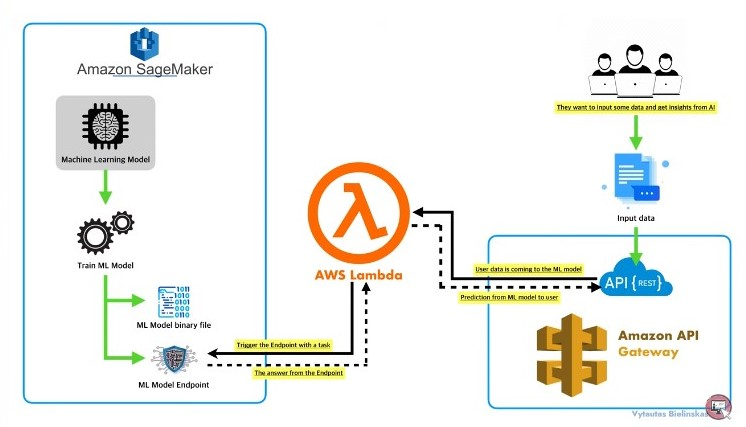



------

# Etapa de limpeza e pré-processamento

**Instalando bibliotecas**

In [1]:
#Upgrade dependencies
#!pip install --upgrade pip
#!pip install --upgrade scikit-learn
#!pip install --upgrade sagemaker

In [35]:
import pandas as pd
import numpy as np

**Leitura da base de dados**

In [3]:
df = pd.read_csv('PLO 2019 v1.1.csv', sep=';')
df.head(3)

,Texto,Ementa,Vereador,Data,Nota,isUtil
0,Art. I Fica denominado Praça Sandra Hitomi Ta...,DENOMINA PRAÇA SANDRA HITOMI TAKAHASHI UM SIST...,Carmo Luiz,43500,9,0
1,Art. lº Ficam proibidos a comercialização e o...,PROÍBE O COMÉRCIO E O USO DOS PRODUTOS QUE ESP...,Luiz Rossini,43500,13,0
2,Art. 1 0 Poder Executivo municipal deverá disp...,DISPÕE SOBRE O ACESSO ÀS INFORMAÇÕES A RESPEIT...,Luiz Cirilo,43500,1,1


In [4]:
# É possível alterar as opções na atividade para exibir mais dados de texto.
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)
df.head(3)

,Texto,Ementa,Vereador,Data,Nota,isUtil
0,"Art. I Fica denominado Praça Sandra Hitomi Takahashi o Sistema de Recreio 01 (Quarteirão 740, Código Cartográfica 3234.6105.0001, com área de 168,00m 2 ) do loteamento Cidade Universitária Campineira, distrito Barão Geraldo, situado na Avenida Dr. Romeu Tórtima (Avenida 01) do mesmo loteamento.\n\nArt. 2 Esta Lei entra em vigor na data de sua publicação.",DENOMINA PRAÇA SANDRA HITOMI TAKAHASHI UM SISTEMA DE RECREIO DO MUNICÍPIO DE CAMPINAS.,Carmo Luiz,43500,9,0
1,"Art. lº Ficam proibidos a comercialização e o uso de espumas, serpentinas e produtos similares acondicionados em spray no município de Campinas.\n\n§ lº A proibição de que trata o caput abrange os produtos com a denominação ""espuma de Carnaval"", ""neve de Carnaval"", ""neve artificial"", ""serpentina"", ""teia"" ou denominação similar acondicionados em sprê1y que possam entrai- em contato direto com a pele, mucosas ou olhos.\n\n§ 2º As espumas E xpansivas de aplicação na indústria, na construção civil e em outras atividades regulamentadas ficam excluídas da proibição de que trata o caput.\n\nArt. 2º O Poder Executivo, por meio de seus órgãos competentes, promoverá ações de fiscalização dos estabelecimentos que comercializarem o:s produtos a que se referem o caput e o § lº do art. 1º desta Lei.\n\nParágrafo unico. A atuação dos agentes de fiscalização poderá ocorrer independentemente de denúncia ou reclamação.\n\nArt. 3º O descumprimento do disposto nesta Lei acarretará ao estabelecimento infrator a aplicação de multa no valor de 500 (quinhentas) Unidades Fiscais de Campinas - UFICs, que será dobrado na primeira reincidência e quadruplicado a partir da segunda reincidência, sem prejuízo das demais penalidades aplicáveis.\n\nParágrafo único. Será considerado reincidência o cometimento por mais de uma vez da mesma infração tipificada nesta Lei no mesmo dia ou em até trinta dias contados da primeira expedição do auto de infração.\n\nArt. 4º\tA receita da aplicação das multas será revertida para o Fundo de Recuperação, Manutenção e Preservação do Meio Ambiente - Proamb.\n\nArt. 5º Na hipótes,e de o infrator ser vendedor ambulante, ocorrerá apenas a apreensão dos produtos a que se referem o caput e o § lº\tcio art. lº desta Lei, sem preJuízo de outras sanções que couberem na forma da lei.\nArt. 6º Quando em posse de usuário, os produtos referidos no caput e no\n§ lº\tdo art. lº\tserão sumariamente apreendidos, não tendo o infrator direito a qualquer indenização nem à restituição dos produtos.\n\nArt. 7º Esta Lei entra em vigor na data de sua publicação.",PROÍBE O COMÉRCIO E O USO DOS PRODUTOS QUE ESPECIFICA ACONDICIONADOS EM SPRAY NO MUNICÍPIO DE CAMPINAS E DÁ OUTRAS PROVIDÊNCIAS.,Luiz Rossini,43500,13,0
2,"Art. 1 0 Poder Executivo municipal deverá disponibilizar, por meio do site oficial da Prefeitura Municipal de Campinas, um espaço em área de fácil acesso denominado Portal de Obras Públicas, obrigatoriamente com as seguintes informações de todas as obras públicas do Município:\nI\t- nome da obra,\nII\t- classificação da obra,\nIII\t- número da licitação correspondente à contratação da empresa responsável pela obra,\nIV\t- número do contrato,\nV\t- empresa responsável por executar a obra,\nVI\t- valor estimado da obra,\nVII\t- valor adicional da obra, se houver termo aditivo,\nVIII\t- situação em que se encontra a obra,\nIX\t- data de início da obra,\nX\t- data de término da obra,\nXI\t- prazo de prorrogação da obra, se for o caso,\nXII\t- especificação e valor da fonte de recursos,\nXIII\t- cronograma das ações que serão realizadas durante a obra,\nXIV\t- anexos referentes à obra,\nXV\t- justificativa de interrupção, paralisação ou cancelamento da obra, se for o caso.\n\nParágrafo único. Nos anexos deverão constar a planilha orçamentária, o contrato com a empresa responsável pela obra e os termos aditivos, caso existam.\n\nArt. 2 As informações de que trata o art. I P deverão ser disponibilizadas sem prejuízo de outras inform

## Realização da análise exploratória de dados

In [5]:
df.dtypes

Texto       object
Ementa      object
Vereador    object
Data         int64
Nota         int64
isUtil       int64
dtype: object

In [6]:
print('O tamanho do dataset é:', df.shape)

O tamanho do dataset é: (52, 6)


In [7]:
df['isUtil'].value_counts()

0    41
1    11
Name: isUtil, dtype: int64

Nota-se que o resultado é desbalanceado

In [8]:
# Verificando se base de dados tem valores ausentes
df.isna().sum()

Texto       0
Ementa      0
Vereador    0
Data        0
Nota        0
isUtil      0
dtype: int64

## Processamento de texto: remoção de palavras irrelevantes e stemming

Remoção de algumas das palavras irrelevantes, stemming nos dados de texto.<br>
Normalização dos dados para reduzir a quantidade de informações diferentes com as quais é preciso lidar, utilizando bilioteca [nltk](https://www.nltk.org/)


In [9]:
#!pip install --upgrade nltk

In [10]:
# Install the library and functions
import nltk
#punkt - tokenizador de frases.
#stopwords - lista de palavras irrelevantes

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Swift\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Swift\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Remoção de palavras irrelevantes e limpeza do texto.
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

# Selecionando stopwords em português
stop = stopwords.words('portuguese')

# New stopword list
# stopwords = [word for word in stop if word not in excluding]
stopwords = [word for word in stop]

In [18]:
# stopwords

In [19]:
# Selecionando stemizador em português
snow = SnowballStemmer('portuguese')

Função para normalização nos dados:
- Substituir todos os valores ausentes por uma string vazia
- Converter o texto em letras minúsculas
- Remover espaços em branco à esquerda ou à direita
- Remover espaços e recuos extras
- Remover marcações HTML

No loop  `for`, todas as palavras que não são numéricas, têm mais de dois caracteres e não estão na lista de palavras irrelevantes são mantidas e retornadas.

In [20]:
import re
def process_text(texts):
    final_text_list=[]
    for sent in texts:

        # Check if the sentence is a missing value
        if isinstance(sent, str) == False:
            sent = ''
  
        filtered_sentence=[]
        
        sent = sent.lower() # Lowercase 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
        
        for w in word_tokenize(sent):
            # Applying some custom filtering here, feel free to try different things
            # Check if it is not numeric and its length>2 and not in stopwords
            if(not w.isnumeric()) and (len(w)>2) and (w not in stopwords) :  
                # Stem and add to filtered list
                filtered_sentence.append(snow.stem(w))
        final_string = " ".join(filtered_sentence) # Final string of cleaned words
 
        final_text_list.append(final_string)
        
    return final_text_list

## Divisão dos dados para treinamento, validação e teste

In [21]:
# Divisão do conjunto de dados para treinamento (80%), validação (10%) e teste (10%).
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df[['Texto', 'Ementa', 'Data', 'Nota']],
                                                  df['isUtil'],
                                                  test_size=0.20,
                                                  shuffle=True,
                                                  random_state=324
                                                 )

X_val, X_test, y_val, y_test = train_test_split(X_val,
                                                y_val,
                                                test_size=0.5,
                                                shuffle=True,
                                                random_state=324)

Aplicar normalização com a função `process_text` definida anteriormente nos conjuntos de treinamento, teste e validação

In [22]:
print('Processand a coluna Texto')
X_train['Texto'] = process_text(X_train['Texto'].tolist())
X_val['Texto'] = process_text(X_val['Texto'].tolist())
X_test['Texto'] = process_text(X_test['Texto'].tolist())

print('Processando a coluna Ementa')
X_train['Ementa'] = process_text(X_train['Ementa'].tolist())
X_val['Ementa'] = process_text(X_val['Ementa'].tolist())
X_test['Ementa'] = process_text(X_test['Ementa'].tolist())

Processand a coluna Texto
Processando a coluna Ementa


In [23]:
X_train.head(2)

,Texto,Ementa,Data,Nota
23,art lei objet implant post colet totens lix toxic supermerc hipermerc campin art denomina-s lix toxic domicili óle orig animal vegetal parágraf unic permit entreg produt garraf pet art remoçã destin material colet fic sob respons prefeitur municipal campin pod autoriz remoçã através ongs cooper empres especializ estatut tal final especif devid cadastr junt secret mei ambient art cumpriment dest lei sujeit infrator seguint penal mult quinhent mil ufic unidad fisc municípi campin mult diár duzent ufic unidad fisc municípi campin adequ lei art pod execut municipal regulament lei praz sessent dias cont part dat public revog disposiçõ contrári,dispõ sobr obrigatoriedad implant post colet óle cozinh supermerc hipermerc municípi campin outr provident,43500,6
10,câm municipal aprov prefeit municipal campin sancion promulg seguint lei art fic estabelec descont cinquent cent valor impost sobr propriedad predial territorial urban ipt imóv edific ating enchent inund alag caus chuv municípi campin art considera-s imóv ating enchent inund elou alag edific sofr dan físic instal elétr hidrául decorrent invasã irresist águ cerc direit vir morador além dan caus móv eletrodomést resident ating art benefíci acord propost val imóv legaliz construíd dentr parâmetr leg respeit norm exig arta descont conced relaçã impost dev ano/exercíci seguint ocorrent prejuíz decorrent enchent inund elou alag descont apen sobr impost sobr acessóri descont ipt acumul dem descont isençõ conced lei 11.111 dezembr 2001. art descont iptu conced mediant requer interess devid instruíd prov confirm dan dirig secret municipal financ efet avali consider prov instruçã ped laud defes civil fot dat comprov ambient boletim ocorrent notíc veicul mei impress eletrôn declar express dan dem document faz necessári requer trat present lei dev respond decisã concess denegatór bas fundament probatóri apresent iii requer individual cad situaçã respeit praz sessent dias protocol após event danos hipótes event danos ocorr vez durant ano descont cumul art despes decorrent execu dest lei corr cont dotaçõ orçamentár própr suplement necessári art lei entra vigor exercíci seguint dat public,dispõ sobr concessã descont valor impost sobr propriedad predial territorial urban -iptu imóv edific ating enchent inund alag caus chuv municípi campin,43500,7


In [24]:
X_val.head(2)

,Texto,Ementa,Data,Nota
43,art fic instituíd municípi campin mês fevereir violet dedic realiz campanh erradic analfabet campin art mês fevereir violet realiz busc ativ pesso oportun frequent sal aul temp propíci art lei entra vigor dat public,institu mês fevereir violet dedic realiz campanh erradic analfabet campin,43516,10
36,art fic denomin centr educ infantil pastor billy grah centr educ infantil situ rua juvenal oliveir bairr jardim doming art lei entra vigor dat public,denomin centr educ infantil pastor billy grah centr educ infantil municípi campin,43509,9


In [25]:
X_test.head(2)

,Texto,Ementa,Data,Nota
0,"art fic denomin prac sandr hitom takahash sistem recrei quart códig cartográf 3234.6105.0001 áre 168,00m loteament cidad universitár campineir distrit barã gerald situ aven dr. rom tórtim aven loteament art lei entra vigor dat public",denomin prac sandr hitom takahash sistem recrei municípi campin,43500,9
30,art fic assegur crianc adolescent cuj pai mã respons pesso deficient idad igual superior sessent anos prioridad vag unidad red públic municipal ensin próxim resident fim dispost caput dest artig pesso deficient idad igual superior sessent anos dev solicit cadastr diret unidad red públic municipal ensin inter famíl mediant apresent document identific crianc adolescent document pai mã respons atest condiçã pesso deficient idad superior sessent anos iii comprov resident cas respons pais crianc adolescent necessári apresent certidã comprov guard art despes decorrent implant dest lei corr cont dotaçõ orçamentár própr suplement necessári art lei entra vigor dat public,assegur crianc adolescent cuj pai mã respons pesso deficient idad igual superior sessent anos prioridad vag unidad red públic municipal ensin próxim resident,43502,7


In [29]:
# salvando dados normalizados
X_train.to_csv('X_train_normalizado.csv', sep=';', index=False)
X_val.to_csv('X_val_normalizado.csv',  sep=';', index=False)
X_test.to_csv('X_test_normalizado.csv',  sep=';', index=False)

# recuperando dados normalizados, se precisar
#X_train = pd.read_csv('X_train_normalizado.csv', sep=';')
#X_val = pd.read_csv('X_val_normalizado.csv', sep=';')
#X_test = pd.read_csv('X_test_normalizado.csv', sep=';')

## Processamento de dados com pipelines e um ColumnTransformer

Como temos dados numéricos e de texto, definimos os seguintes pipelines:

   * Para o pipeline de dados numéricos, o __numerical_processor__ usa um MinMaxScaler. 
   * Para o pipeline de dados de texto, o __text_processor__ usa  `CountVectorizer()` nos campos de texto.
   
As preparações seletivas dos recursos do conjunto de dados são reunidas em um ColumnTransformer coletivo, que será usado em um pipeline com um estimador. 

In [30]:
# Grab model features/inputs and target/output
numerical_features = ['Data', 'Nota']
text_features = ['Texto', 'Ementa']

model_features = numerical_features + text_features
model_target = 'isUtil'

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### COLUMN_TRANSFORMER ###
# Preprocess the numerical features
numerical_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', MinMaxScaler()) 
                                ])
# Preprocess 1st text feature (larger vocabulary)
text_processor_0 = Pipeline([
    ('text_vect_0', CountVectorizer(binary=True, max_features=250))
                            ])

# Preprocess 2nd text feature 
text_precessor_1 = Pipeline([
    ('text_vect_1', CountVectorizer(binary=True, max_features=50))
                            ])

# Combine all data preprocessors from above 
# For each processor/step is specified a name, the actual process, and finally the features to be processed
data_preprocessor = ColumnTransformer([
    ('numerical_pre', numerical_processor, numerical_features),
    ('text_pre_0', text_processor_0, text_features[0]),
    ('text_pre_1', text_precessor_1, text_features[1])
                                      ]) 

### DATA PREPROCESSING ###
print('Datasets shapes before processing: ', X_train.shape, X_val.shape, X_test.shape)

X_train = data_preprocessor.fit_transform(X_train).toarray()
X_val = data_preprocessor.transform(X_val).toarray()
X_test = data_preprocessor.transform(X_test).toarray()

print('Datasets shapes after processing: ', X_train.shape, X_val.shape, X_test.shape)

Datasets shapes before processing:  (41, 4) (5, 4) (6, 4)
Datasets shapes after processing:  (41, 302) (5, 302) (6, 302)


Observa-se que o número de recursos nos conjuntos de dados passou de 4 para 302.

In [43]:
# salvando dados transformados
np.save('X_train_transformado.npy', X_train)
np.save('X_val_transformado.npy', X_val)
np.save('X_test_transformado.npy', X_test)

# recuperando dados transformados, se precisar
#X_train = np.load('X_train_transformado.npy')
#X_val = np.load('X_val_transformado.npy')
#X_test = np.load('X_test_transformado.npy)

In [40]:
print(X_train[1])

[0.         0.46153846 0.         1.         1.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         1.         1.         0.         0.
 0.         1.         0.         1.         1.         1.
 0.         0.         0.         0.         0.         0.
 0.         1.         1.         0.         1.         0.
 0.         0.         1.         0.         1.         0.
 0.         1.         1.         0.         0.         1.
 0.         0.         0.         0.         0.         1.
 0.         0.         1.         0.         0.         0.
 0.         1.         1.         1.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         1.         0.         1.         1.         1.
 1.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         1.         0.         1.         0.         1.
 0.         1.         0.         1.         0.         

In [41]:
print(X_val[1])

[0.3        0.61538462 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [42]:
print(X_test[1])

[0.06666667 0.46153846 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         1.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         1.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         1.         0.         1.         0.         0.
 0.         0.         0.         1.         0.         0.
 1.         0.         0.         0.         0.         0.
 1.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## Treinamento de um classificador com um algoritmo integrado ao AWS SageMaker

Utilizamos o algoritmo  `LinearLearner()` do SageMaker com as seguintes opções:
* __Permissions -__  `role` está configurado como a role do AWS Identity and Access Management (IAM) do ambiente atual.
* __Compute power -__ Usaremos os parâmetros  `train_instance_count` = `1` e  `train_instance_type` = `ml.m4.xlarge`. 
* __Model type -__  `predictor_type` está configurado como __`binary_classifier`__, porque estamos com um problema de classificação binária. 


In [28]:
import sagemaker

# Call the LinearLearner estimator object
linear_classifier = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                           instance_count=1,
                                           instance_type='ml.m4.xlarge',
                                           predictor_type='binary_classifier')

Para definir as partes de treinamento, validação e teste do estimador, usaremos a função  `record_set()` do  `binary_estimator`. 

In [29]:
train_records = linear_classifier.record_set(X_train.astype('float32'),
                                            y_train.values.astype('float32'),
                                            channel='train')
val_records = linear_classifier.record_set(X_val.astype('float32'),
                                          y_val.values.astype('float32'),
                                          channel='validation')
test_records = linear_classifier.record_set(X_test.astype('float32'),
                                           y_test.values.astype('float32'),
                                           channel='test')

Com a função  `fit()` aplicamos uma versão distribuída do algoritmo Stochastic Gradient Descent (SGD). __Esse processo leva cerca de 3 a 4 minutos em uma instância ml.m4.xlarge do AWS Sagemaker.__

In [30]:
linear_classifier.fit([train_records,
                       val_records,
                       test_records],
                       logs=False)

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: linear-learner-2023-04-30-16-55-06-020



2023-04-30 16:55:06 Starting - Starting the training job....
2023-04-30 16:55:31 Starting - Preparing the instances for training.............
2023-04-30 16:56:44 Downloading - Downloading input data....
2023-04-30 16:57:09 Training - Downloading the training image.............
2023-04-30 16:58:20 Training - Training image download completed. Training in progress......
2023-04-30 16:58:50 Uploading - Uploading generated training model.
2023-04-30 16:59:02 Completed - Training job completed


## Avaliação do modelo

Usaremos a análise do SageMaker para ver métricas de performance do conjunto de testes. 

O linear learner apresenta métricas que são calculadas durante o treinamento. É possível usar essas métricas ao ajustar o modelo. As métricas disponíveis para o conjunto de validação são:

- objective_loss - No caso de um problema de classificação binária, será o valor médio da perda logística para cada época
- binary_classification_accuracy - A precisão do modelo final no conjunto de dados, ou seja, quantas previsões o modelo acertou
- precision - Quantifica o número de previsões de classes positivas que são de fato positivas
- recall - Quantifica o número de previsões de classes positivas
- binary_f_beta - A média harmônica das métricas de precisão e recall

Neste exemplo, é importante observar quantas previsões estavam corretas. O uso da métrica **binary_classification_accuracy** é apropriado.

In [31]:
sagemaker.analytics.TrainingJobAnalytics(linear_classifier._current_job_name, 
                                         metric_names = ['test:binary_classification_accuracy']
                                        ).dataframe()

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


,timestamp,metric_name,value
0,0.0,test:binary_classification_accuracy,0.833333


In [32]:
sagemaker.analytics.TrainingJobAnalytics(linear_classifier._current_job_name).dataframe()

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


,timestamp,metric_name,value
0,0.0,train:progress,66.666667
1,0.0,test:binary_f_beta,0.666667
2,0.0,test:recall,1.000000
3,0.0,train:objective_loss,0.249677
4,0.0,test:objective_loss,0.470651
5,0.0,validation:binary_f_beta,0.666667
6,0.0,validation:objective_loss,0.648490
7,0.0,validation:objective_loss:final,0.499667
8,0.0,test:precision,0.500000
9,0.0,validation:binary_classification_accuracy,0.800000


Podemos ver valor de acurácia aproximado de 0,85.

## Implementação do modelo em um endpoint

Aqui vamos fazer deployment do modelo para usar esse modelo em um ambiente de produção. 
Para implementar o modelo, é possível usar diferentes tipos de instância, como: _ml.t2.medium_, _ml.c4.xlarge_), entre outras. 
__Esse processo levará de 7 a 8 minutos.__

In [33]:

linear_classifier_predictor = linear_classifier.deploy(initial_instance_count = 1,
                                                       instance_type = 'ml.c5.large'
                                                      )

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating model with name: linear-learner-2023-04-30-16-59-05-654
INFO:sagemaker:Creating endpoint-config with name linear-learner-2023-04-30-16-59-05-654
INFO:sagemaker:Creating endpoint with name linear-learner-2023-04-30-16-59-05-654


----------!

## Teste do endpoint

Agora que o endpoint está implementado, testaremos envio de dados de teste localmente e veremos previsões dos dados.

In [34]:
import numpy as np

# Get test data in batch size of 1 and make predictions.
prediction_batches = [linear_classifier_predictor.predict(batch)
                      for batch in np.array_split(X_test.astype('float32'), 1)
                     ]

# Get a list of predictions
print([pred.label['score'].float32_tensor.values[0] for pred in prediction_batches[0]])
print([pred.label['predicted_label'].float32_tensor.values[0] for pred in prediction_batches[0]])

[0.20470072329044342, 0.7531663179397583, 0.6881096959114075, 0.2775072455406189, 0.2640203535556793, 0.17339107394218445]
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0]


In [35]:
# Get test data for one data and make prediction.
prediction = [linear_classifier_predictor.predict(X_test.astype('float32')[1])]

# Get a list of predictions
print([pred.label['score'].float32_tensor.values[0] for pred in prediction[0]])
print([pred.label['predicted_label'].float32_tensor.values[0] for pred in prediction[0]])

[0.7531663179397583]
[1.0]


In [37]:
prediction = [linear_classifier_predictor.predict(X_test.astype('float32')[1])]
print([pred.label['score'] for pred in prediction[0]])
print([pred.label['predicted_label'] for pred in prediction[0]])

[float32_tensor {
  values: 0.7531663179397583
}
]
[float32_tensor {
  values: 1.0
}
]


In [39]:
test_data = X_test.astype('float32')[1]

In [47]:
test_data

array([0.06666667, 0.46153846, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [41]:
prediction = [linear_classifier_predictor.predict(test_data)]

# Get a list of predictions
print([pred.label['score'].float32_tensor.values[0] for pred in prediction[0]])
print([pred.label['predicted_label'].float32_tensor.values[0] for pred in prediction[0]])

[0.7531663179397583]
[1.0]


## Remoção de artefatos do modelo

Após teste concluído, é importante excluir o endpoint, para não gerar custo de utilização de recursos AWS.


In [48]:
linear_classifier_predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2023-04-30-16-59-05-654
INFO:sagemaker:Deleting endpoint with name: linear-learner-2023-04-30-16-59-05-654


# Próximos passos para Parte 2:

- experimentar modelos de ML diferentes comparando as métricas
- testar os modelos com entrada de dados de PLO novas
- experimentar mudança de critério dos PLOs de “isUtil” para “Aproved”
- aumentar base de dados de PLOs
